# EDA - Exploratory Data Analysis
Разведочный анализ данных

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.shape

(891, 12)

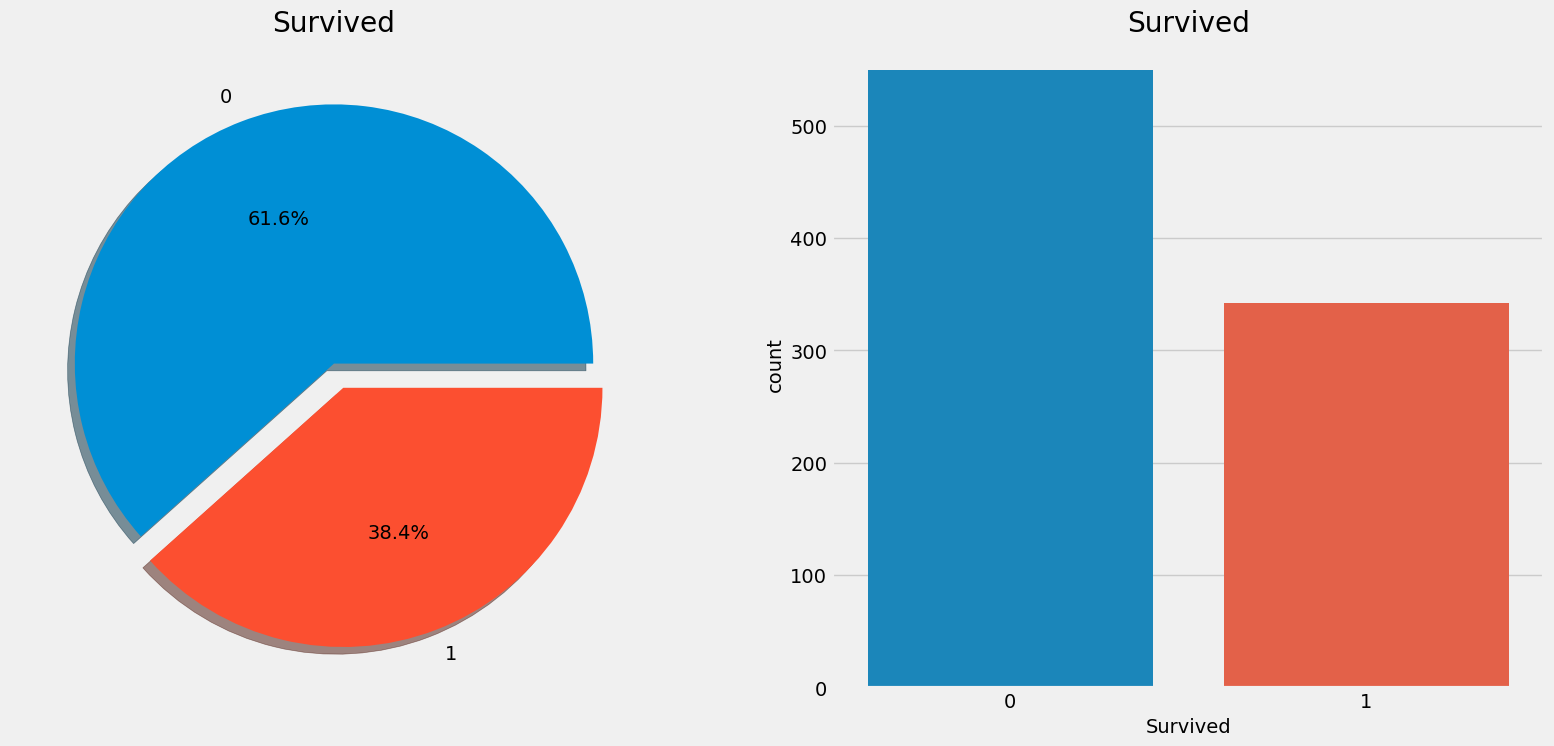

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Типы признаков

In [7]:
data[["Embarked"]]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


### Label Encoding

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
le.fit_transform(data['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

## OneHotEncoding или Dummy

In [10]:
pd.get_dummies(data["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [11]:
data.groupby(['Sex', "Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

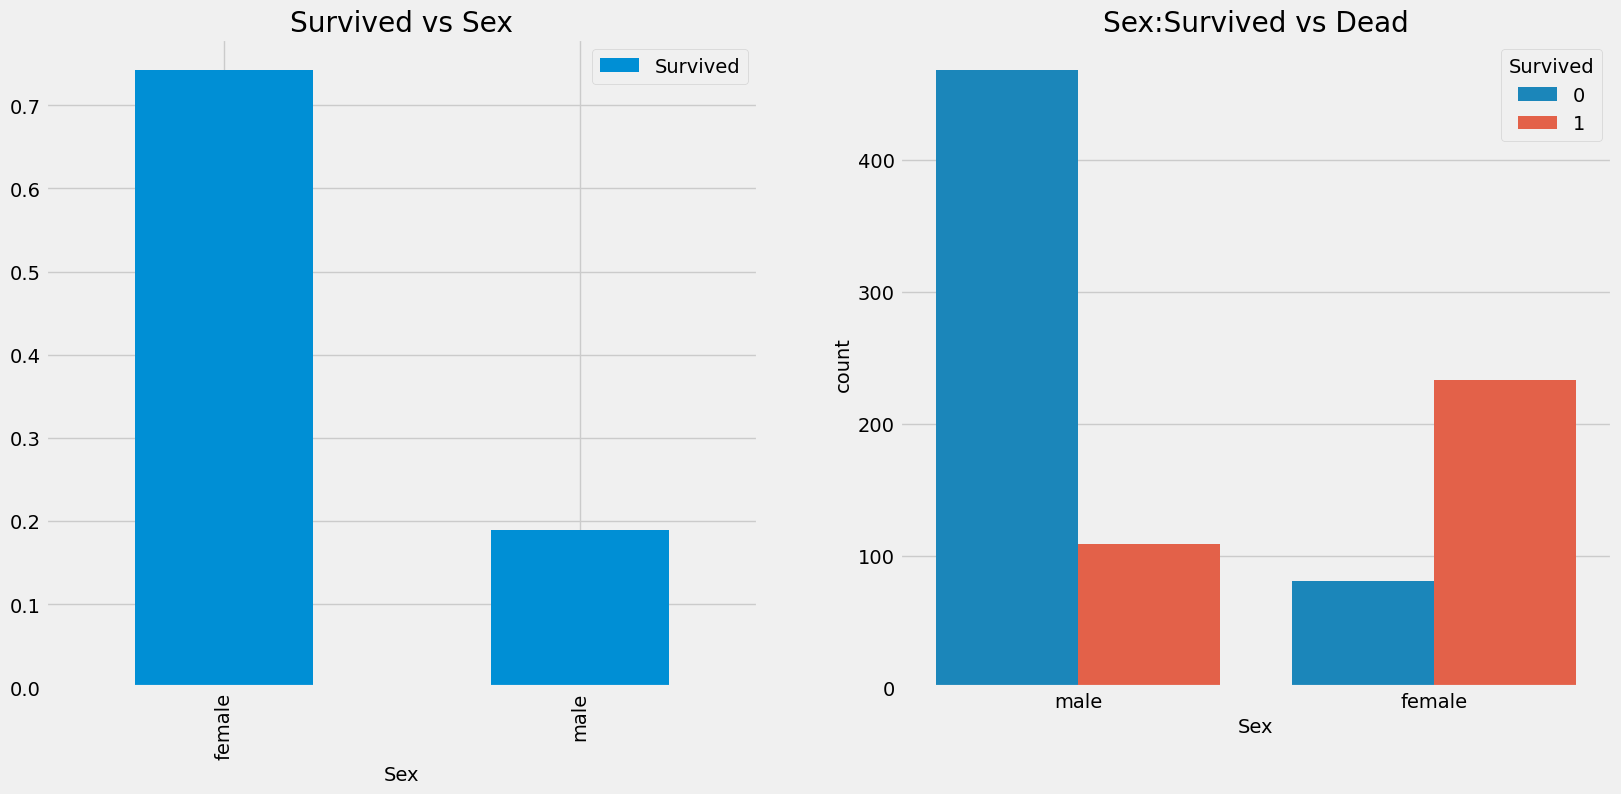

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [13]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


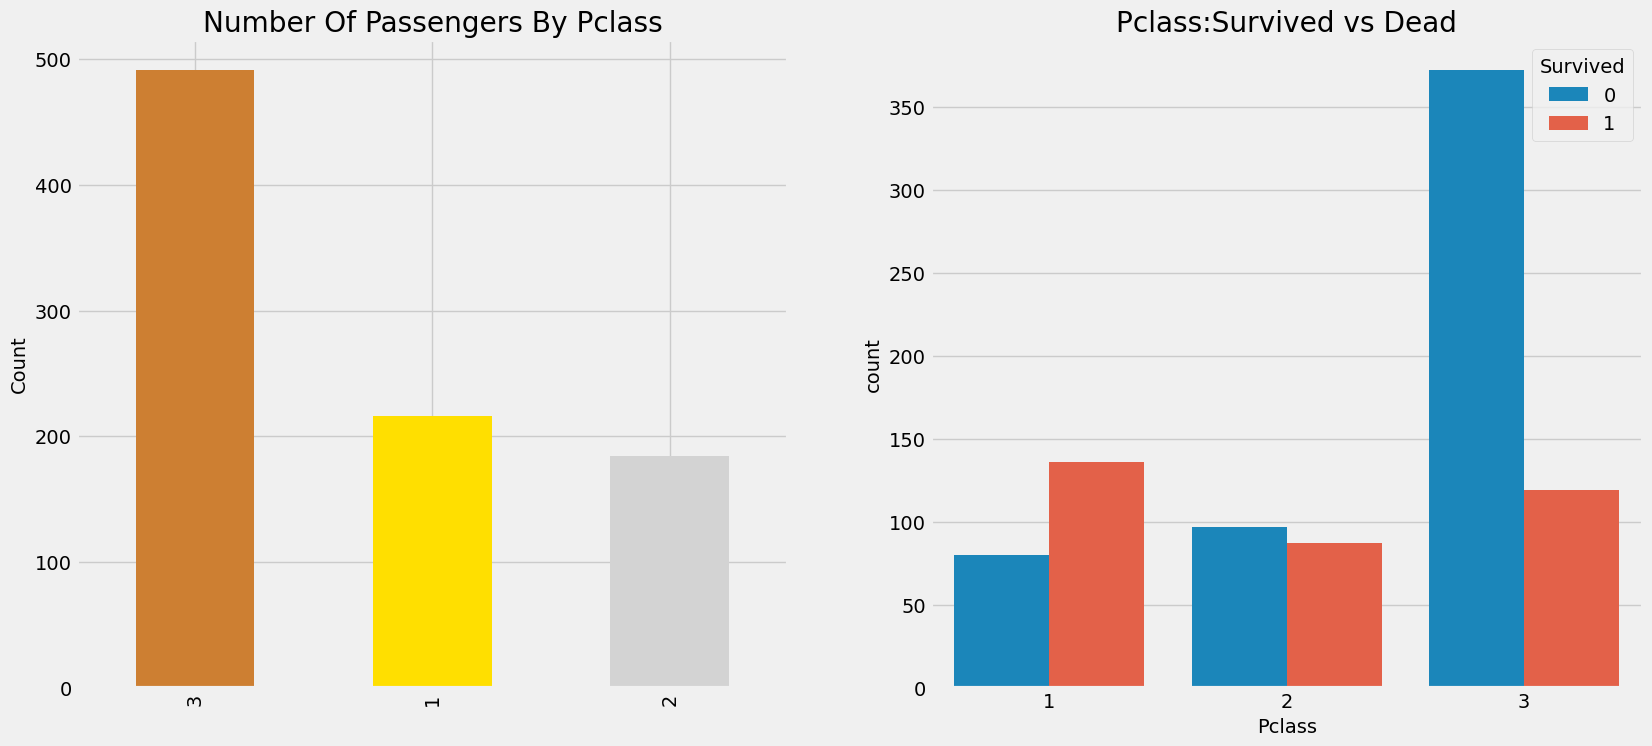

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [15]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

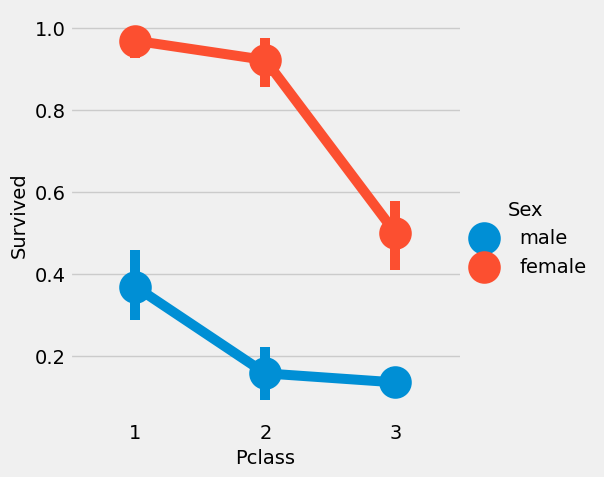

In [16]:
sns.catplot(x="Pclass", y="Survived", hue= "Sex", data=data, kind = "point")
plt.show()

In [17]:
print(data["Age"].max(),data["Age"].min(), data["Age"].mean())

80.0 0.42 29.69911764705882


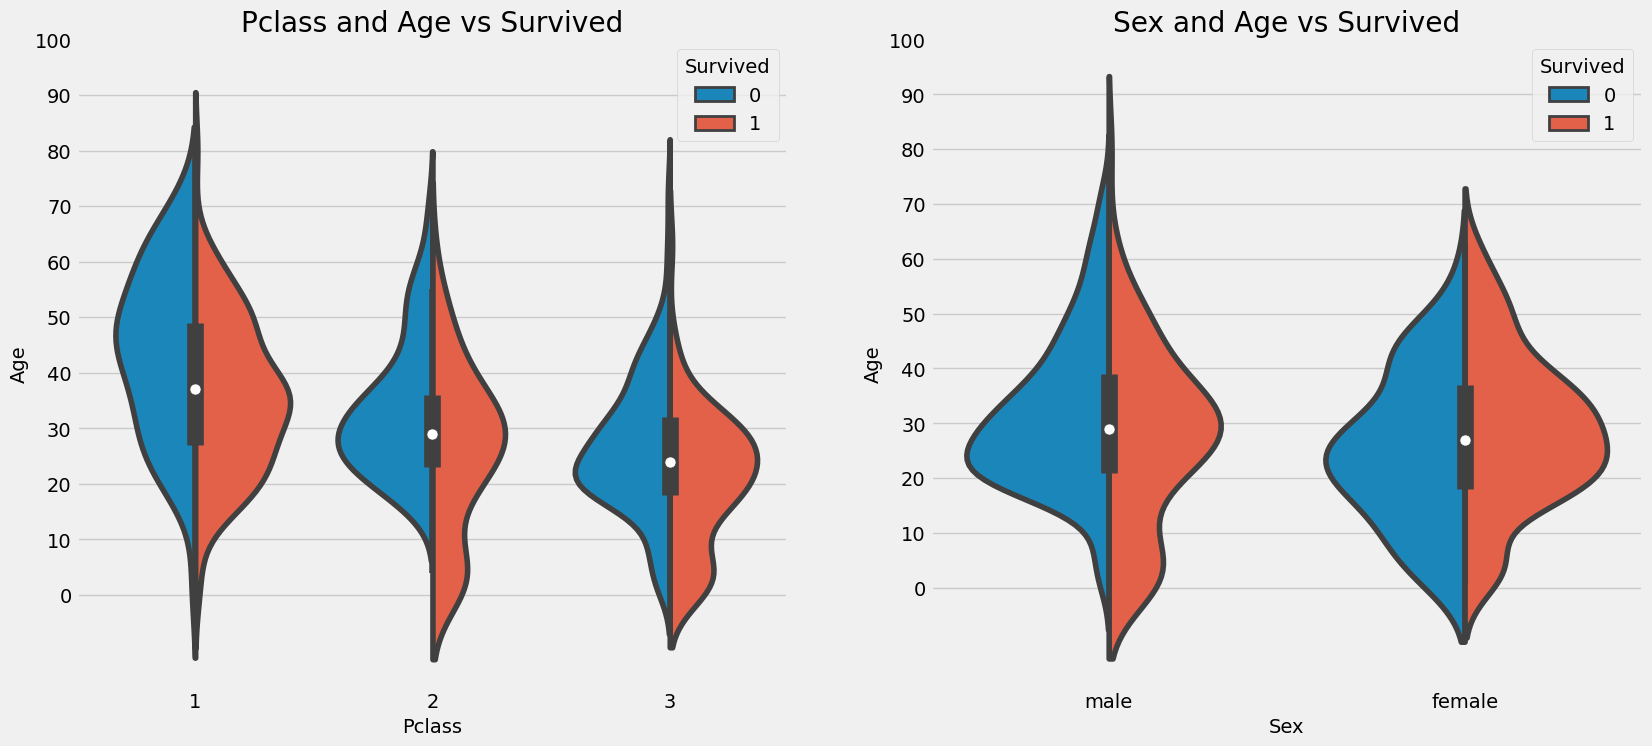

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x= "Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [19]:
data[["Name"]]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [20]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract("([A-Za-z]+)\.")

In [21]:
data.Initial

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [22]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [23]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
data.groupby("Initial")['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [25]:
data.loc[(data.Age.isnull())&(data.Initial=="Mr"), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=="Mrs"), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=="Master"), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=="Miss"), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=="Other"), 'Age']=46

In [26]:
data.Age.isnull().any()

False

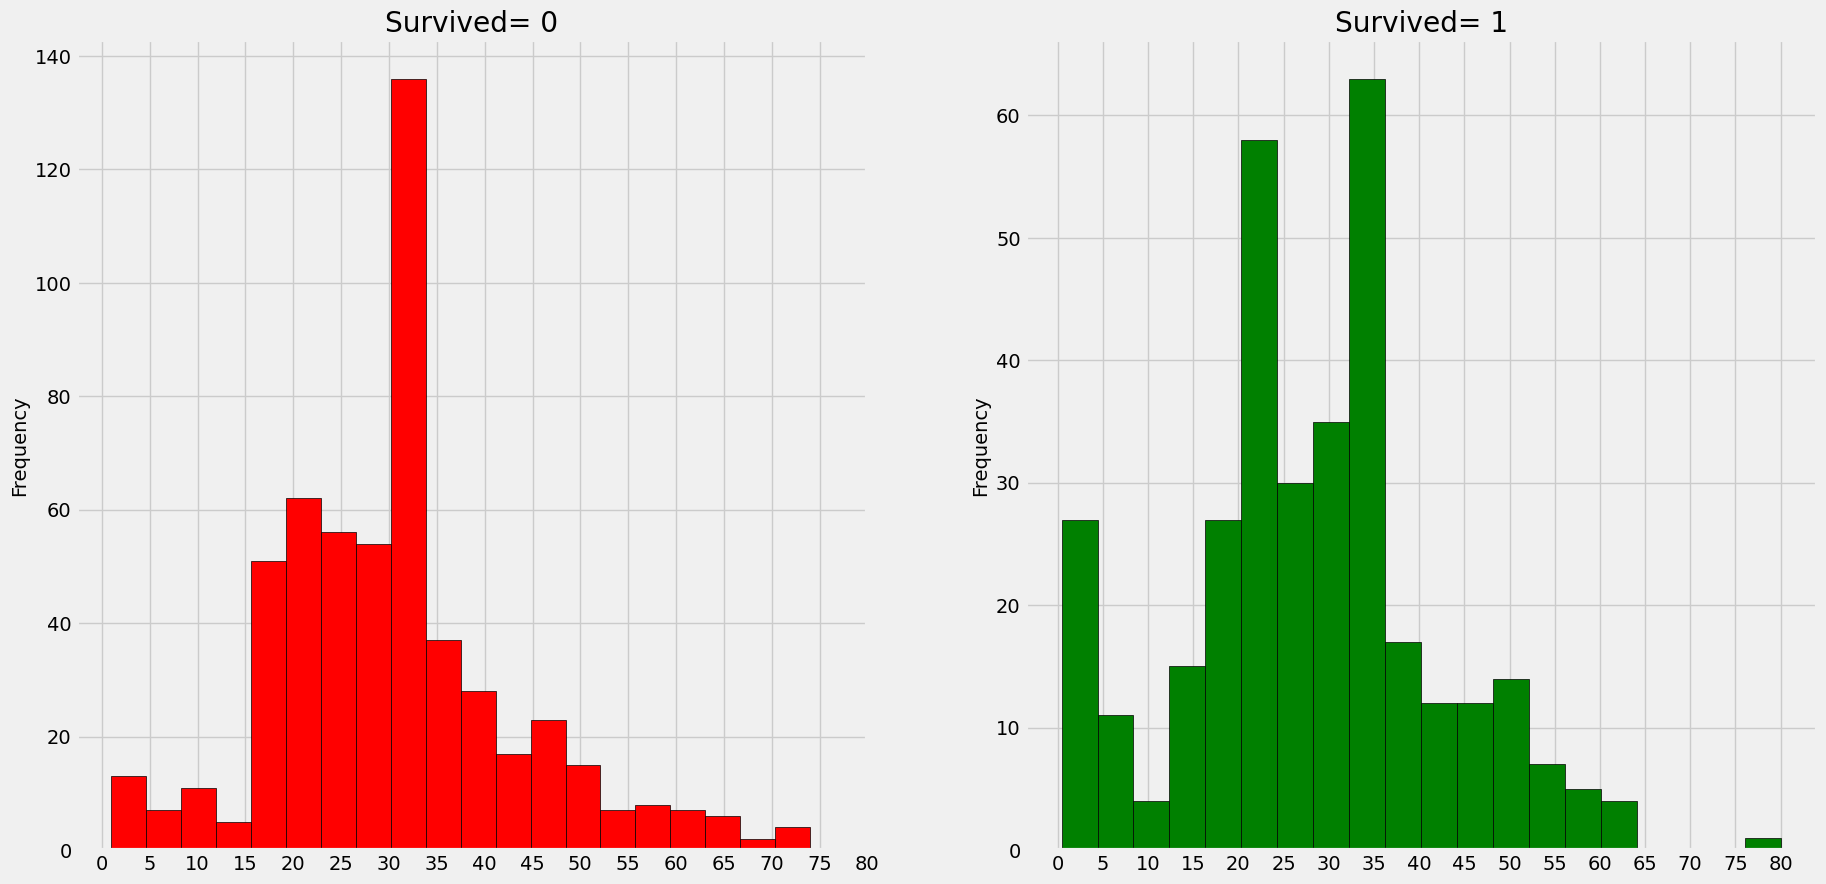

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

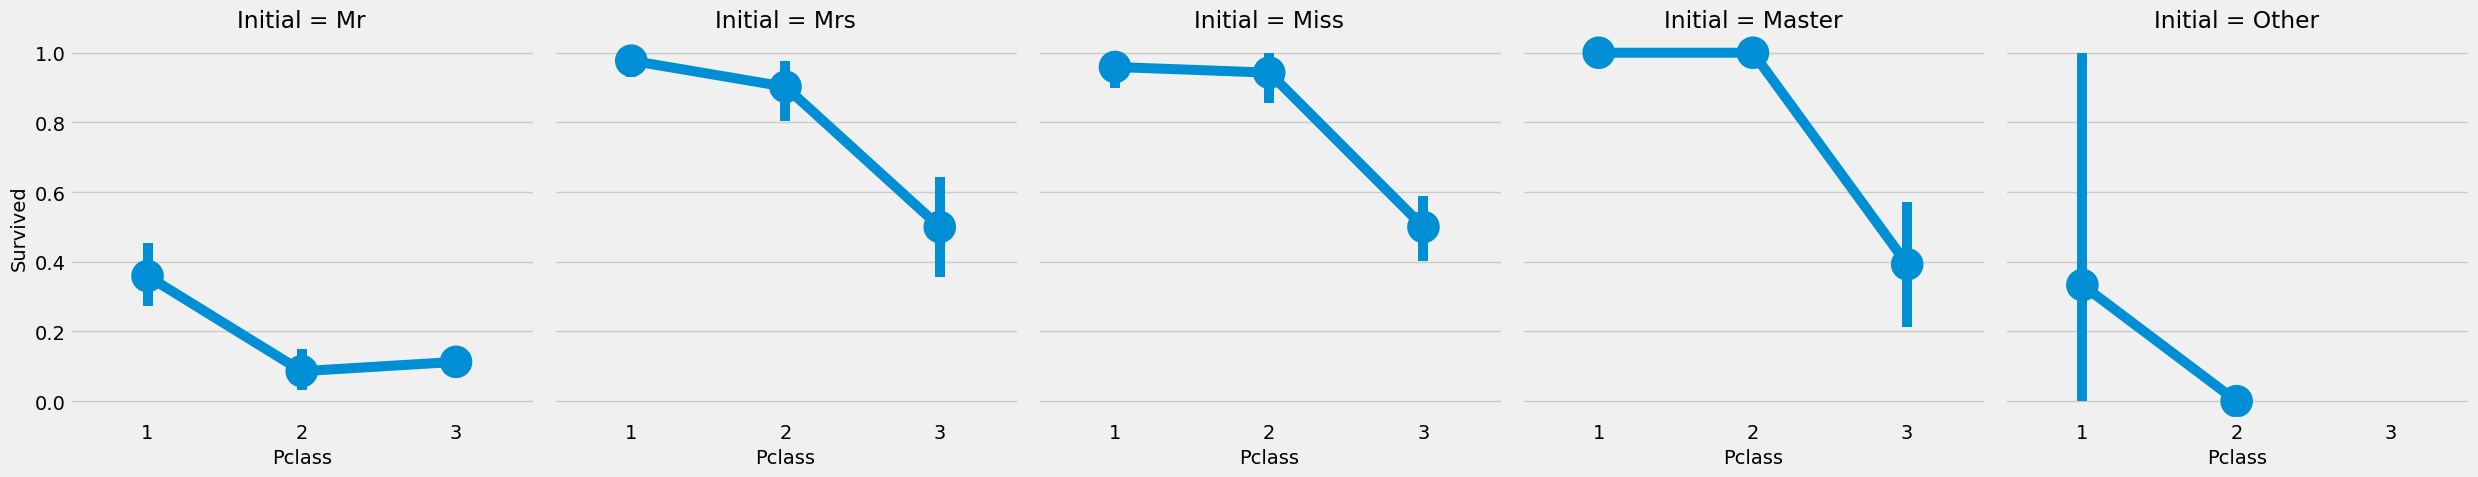

In [28]:
sns.catplot(x="Pclass", y="Survived", col="Initial", data=data, kind="point")
plt.show()

In [29]:
pd.crosstab([data.Embarked, data.Pclass], 
            [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

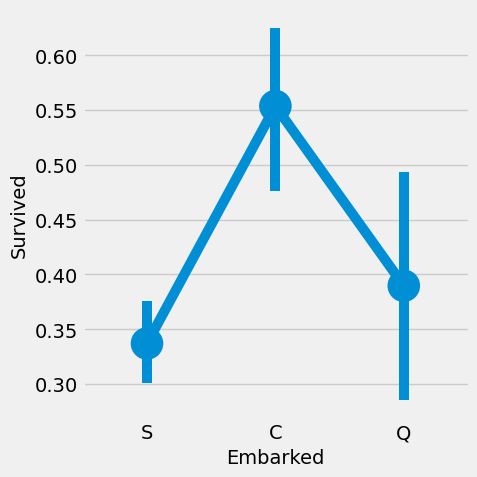

In [30]:
### Шансы на выживание по порту отплытия
sns.catplot(x="Embarked", y="Survived", data=data, kind='point')
plt.show()

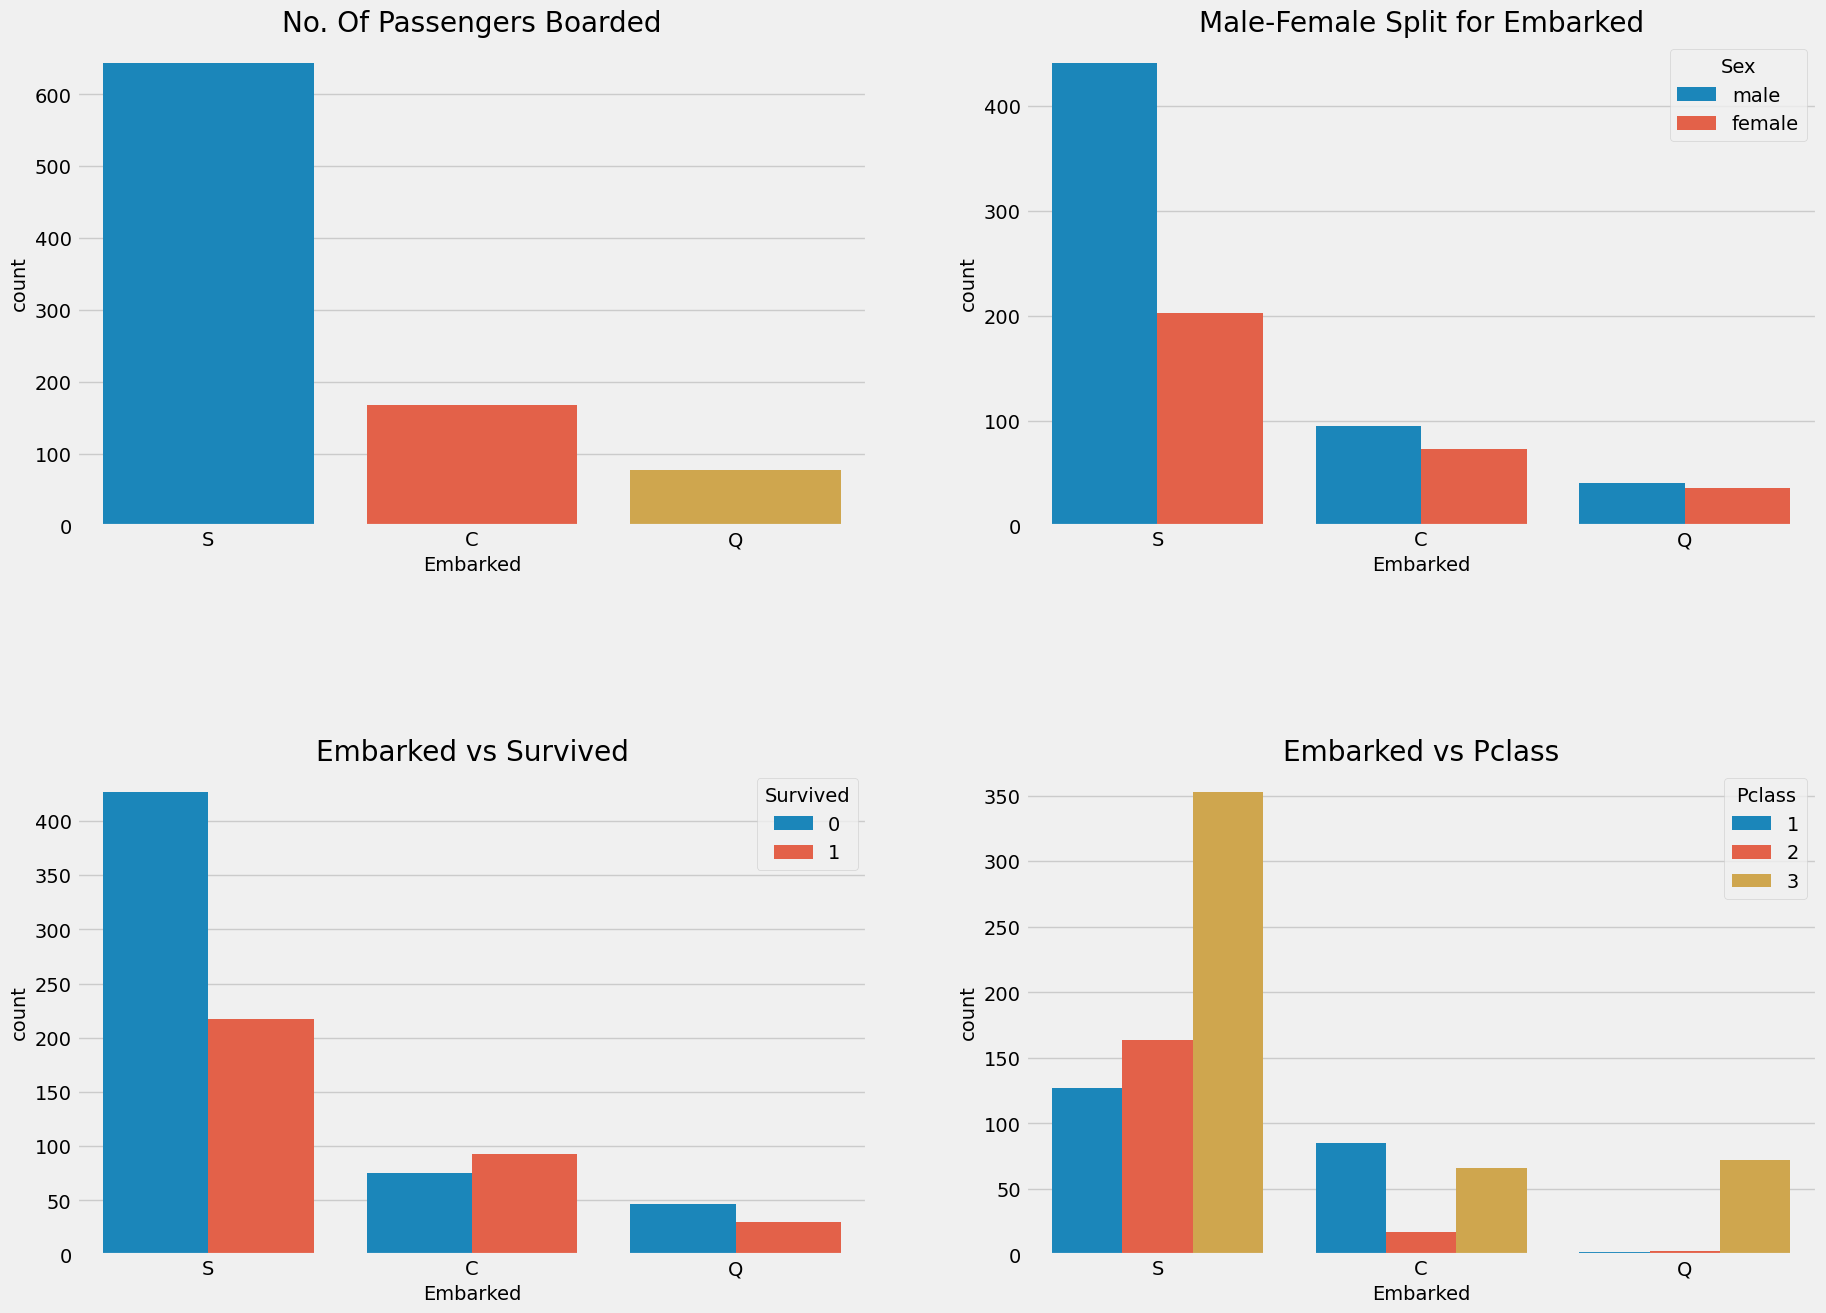

In [31]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

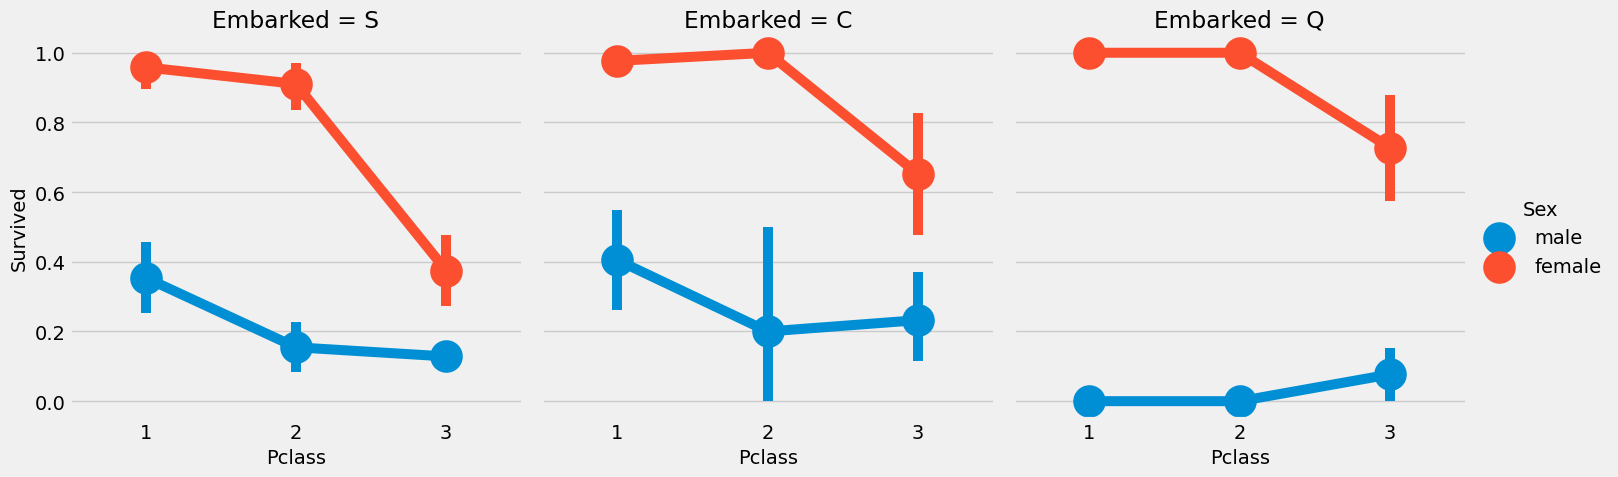

In [32]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", col='Embarked', data=data, kind='point')
plt.show()

In [33]:
import pandas as pd

In [34]:
data["Embarked"].isnull().any()

True

In [35]:
data["Embarked"].fillna("S", inplace=True)

In [36]:
data["Embarked"].isnull().any()

False

In [37]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


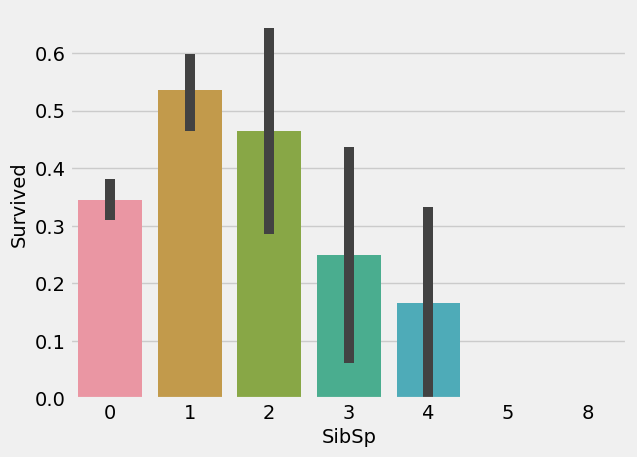

In [38]:
sns.barplot(x="SibSp", y="Survived", data=data)
plt.show()

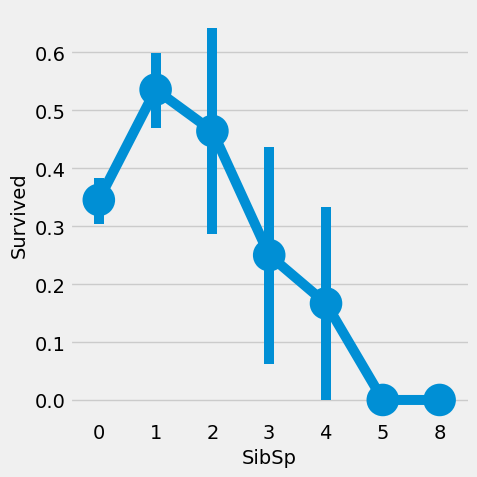

In [39]:
sns.catplot(x="SibSp", y="Survived", data=data, kind='point')
plt.show()

In [40]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [41]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


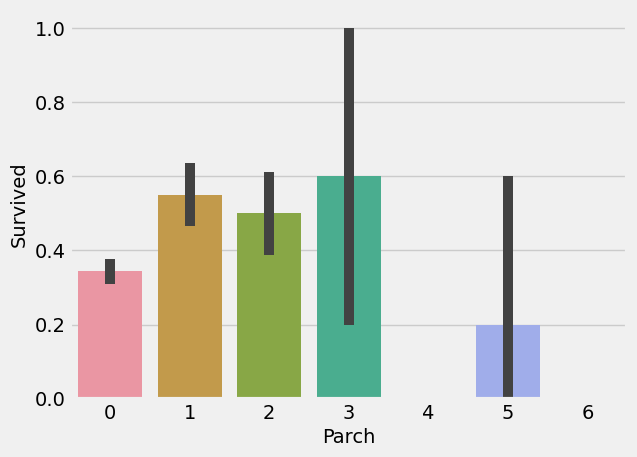

In [42]:
sns.barplot(x="Parch", y="Survived", data=data)
plt.show()

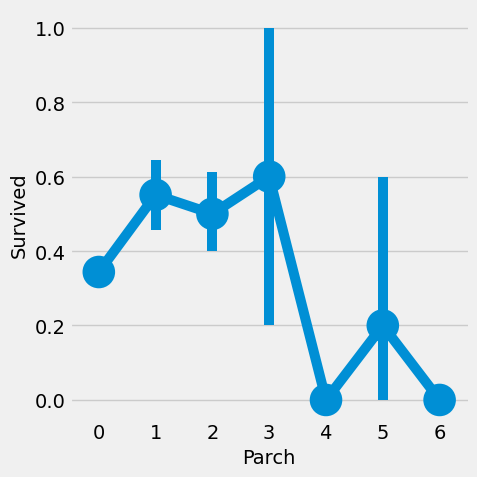

In [43]:
sns.catplot(x="Parch", y="Survived", data=data, kind='point')
plt.show()

In [44]:
data["Fare"].max()

512.3292

In [45]:
data["Fare"].min()

0.0

In [46]:
data["Fare"].mean()

32.204207968574636

Text(0.5, 1.0, 'Fares in Pclass 3')

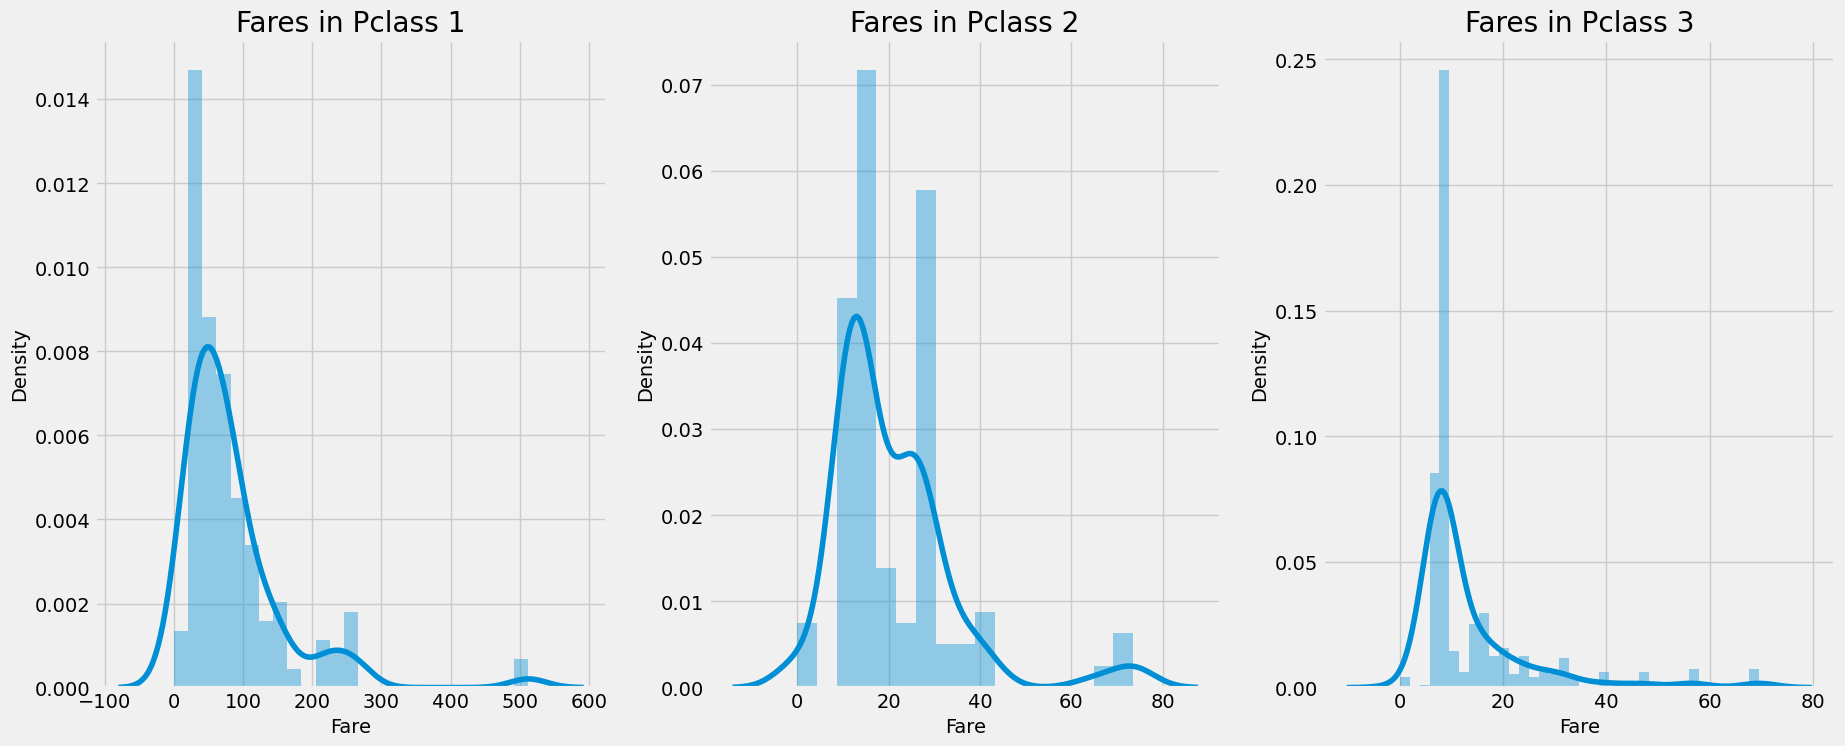

In [47]:
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.distplot(data[data['Pclass']==2].Fare, ax = ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.distplot(data[data['Pclass']==3].Fare, ax = ax[2])
ax[2].set_title("Fares in Pclass 3")

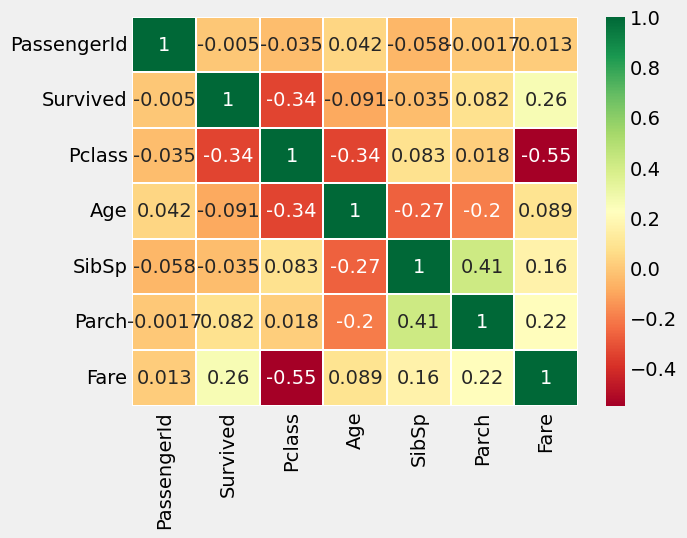

In [48]:
sns.heatmap(data.corr(), annot= True, linewidths=0.2, cmap="RdYlGn")
fig=plt.gcf()
plt.show()

In [49]:
data['Age_band'] = 0
data.loc[data["Age"]<=16, "Age_band"]=0
data.loc[(data["Age"]>16)&(data["Age"]<=32), "Age_band"]=1
data.loc[(data["Age"]>32)&(data["Age"]<=48), "Age_band"]=2
data.loc[(data["Age"]>48)&(data["Age"]<=64), "Age_band"]=3
data.loc[data["Age"]>64, "Age_band"]=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [50]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer_r")

,Age_band
1,382
2,325
0,104
3,69
4,11


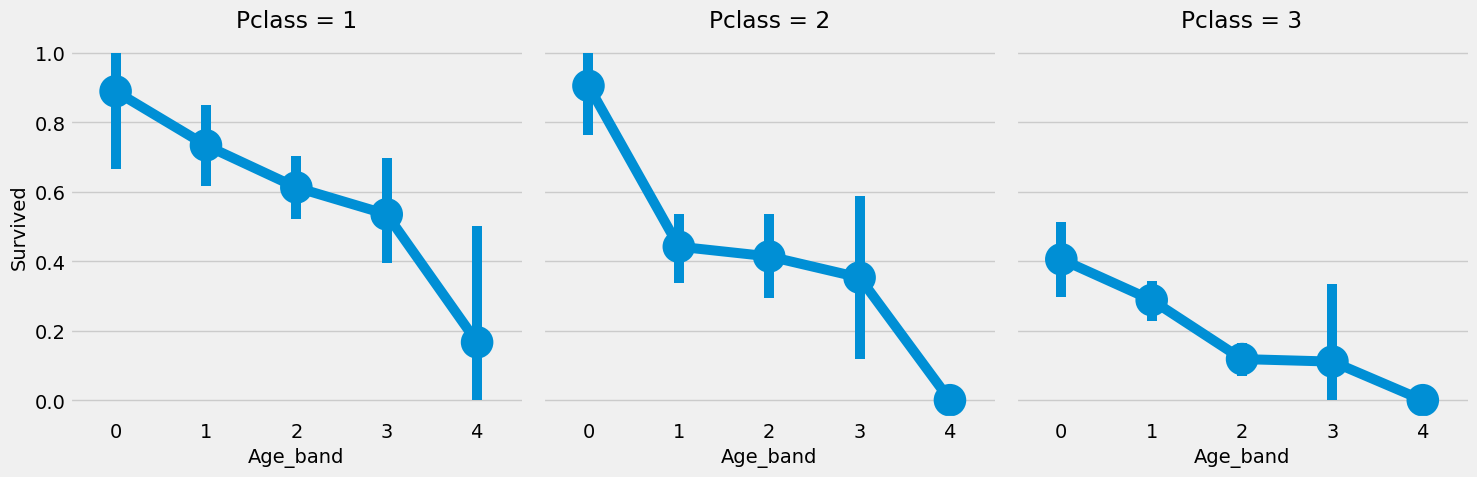

In [51]:
sns.catplot(x="Age_band", y="Survived", data=data, col="Pclass", kind='point')
plt.show()

In [52]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"]+data["SibSp"]
data['Alone']=0
data.loc[data.Family_Size==0, "Alone"]=1

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


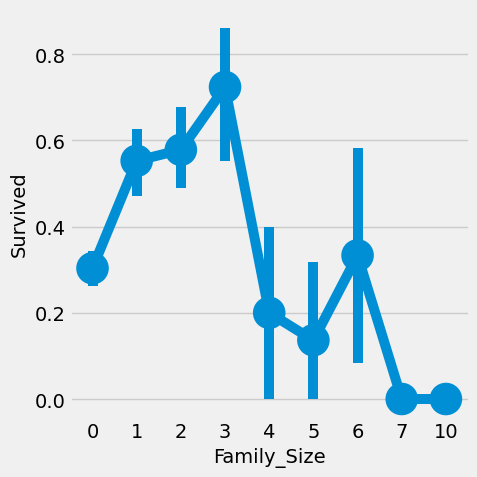

In [54]:
sns.catplot(x="Family_Size", y="Survived", data=data, kind="point")
plt.show()

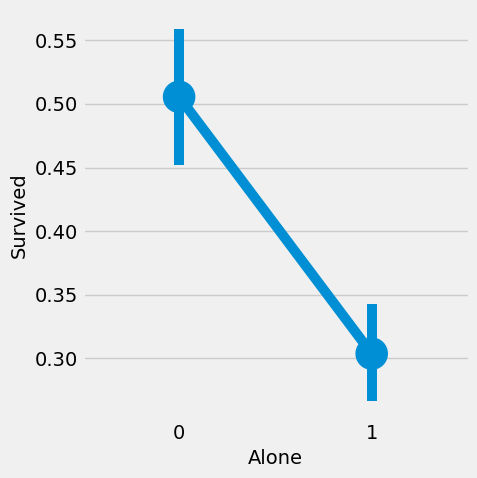

In [55]:
sns.catplot(x="Alone", y="Survived", data=data, kind="point")
plt.show()

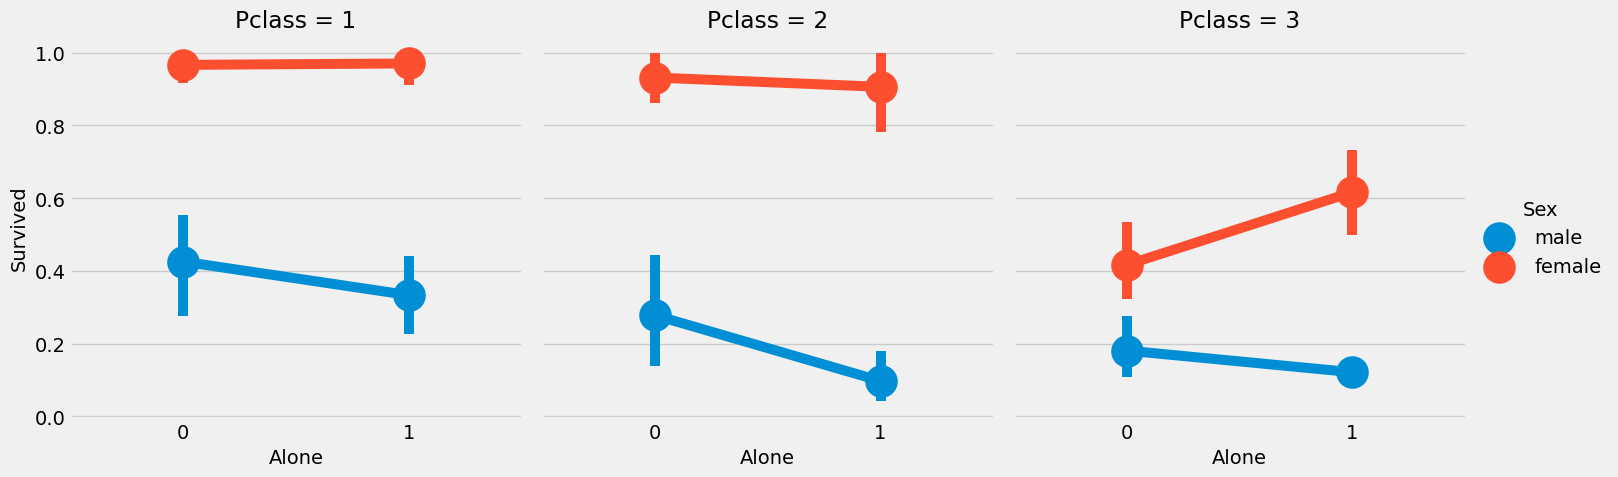

In [56]:
sns.catplot(x="Alone", y="Survived", data=data, kind="point", hue="Sex", col="Pclass")
plt.show()

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


In [58]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)


In [59]:
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [61]:
data['Fare_cat'] = 0
data.loc[data["Fare"]<=7.91, "Fare_cat"]=0
data.loc[(data["Fare"]>7.91)&(data["Fare"]<=14.454), "Fare_cat"]=1
data.loc[(data["Fare"]>14.454)&(data["Fare"]<=31), "Fare_cat"]=2
data.loc[(data["Fare"]>31)&(data["Fare"]<=513), "Fare_cat"]=3
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


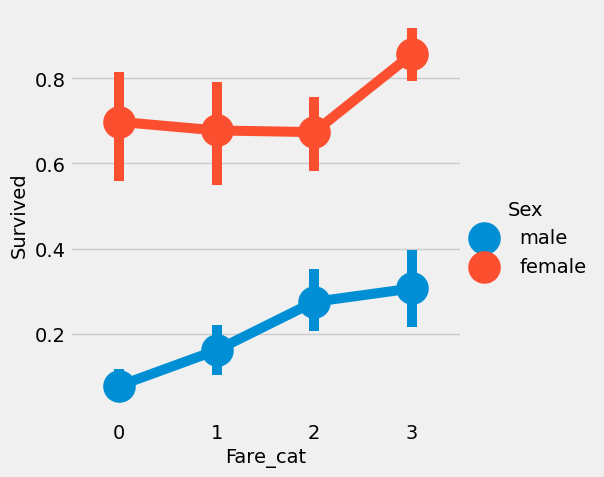

In [62]:
sns.catplot(x="Fare_cat", y="Survived", hue="Sex", data=data, kind="point")
plt.show()

In [63]:
data["Sex"].replace(["male", "female"], [0,1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0,1,2], inplace=True)
data["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0,1,2,3,4], inplace=True)


In [64]:
data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis=1, inplace=True)


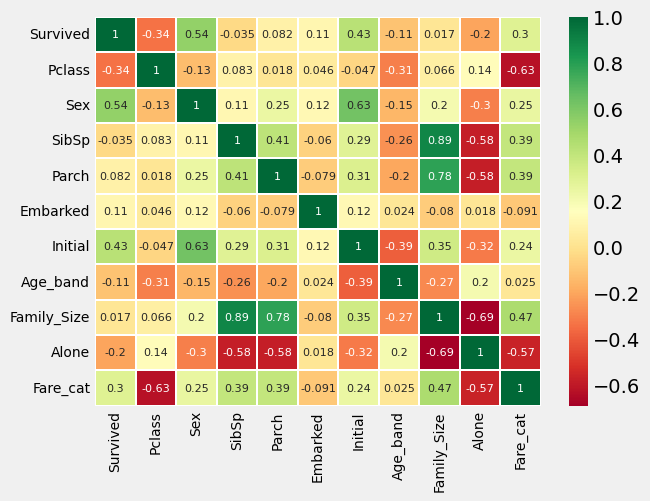

In [65]:
sns.heatmap(data.corr(), annot= True, linewidths=0.2, cmap="RdYlGn", annot_kws={'size':8})
fig.set_size_inches(18,15)
fig=plt.gcf()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Подготовка данных для обучения

Так как мы шикарно разобрали данные на категории будем этим пользоваться. В первую очередь вспомним, что у нас получилось и какие у нас получались значения.

In [67]:
data.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,0.361392,0.735129,1.439955,0.904602,0.602694,1.505051
std,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.001959,0.842373,1.613459,0.489615,1.118148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,4.000000,10.000000,1.000000,3.000000


In [81]:
y, X = dmatrices('Survived ~ Pclass + Sex + Alone + Embarked + Initial + Age_band + \
                  C(Fare_cat) + Family_Size + C(SibSp) + C(Parch)',
                  data, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'C(Fare_cat)[T.1]', 'C(Fare_cat)[T.2]', 'C(Fare_cat)[T.3]',
       'C(SibSp)[T.1]', 'C(SibSp)[T.2]', 'C(SibSp)[T.3]', 'C(SibSp)[T.4]',
       'C(SibSp)[T.5]', 'C(SibSp)[T.8]', 'C(Parch)[T.1]', 'C(Parch)[T.2]',
       'C(Parch)[T.3]', 'C(Parch)[T.4]', 'C(Parch)[T.5]', 'C(Parch)[T.6]',
       'Pclass', 'Sex', 'Alone', 'Embarked', 'Initial', 'Age_band',
       'Family_Size'],
      dtype='object')


In [82]:
X = X.rename(columns = {'C(Fare_cat)[T.1]':'Fare_1',
                        'C(Fare_cat)[T.2]':'Fare_2',
                        'C(Fare_cat)[T.3]':'Fare_3',
                        'C(SibSp)[T.1]':'SibSp_1',
                        'C(SibSp)[T.2]':'SibSp_2',
                        'C(SibSp)[T.3]':'SibSp_3',
                        'C(SibSp)[T.4]':'SibSp_4',
                        'C(SibSp)[T.5]':'SibSp_5',
                        'C(SibSp)[T.6]':'SibSp_6',
                        'C(SibSp)[T.7]':'SibSp_7',
                        'C(SibSp)[T.8]':'SibSp_8',
                        'C(Parch)[T.1]':'Parch_1',
                        'C(Parch)[T.2]':'Parch_2',
                        'C(Parch)[T.3]':'Parch_3',
                        'C(Parch)[T.4]':'Parch_4',
                        'C(Parch)[T.5]':'Parch_5',
                        'C(Parch)[T.6]':'Parch_6',
                        'C(Parch)[T.1]':'Parch_1',
                        'C(Parch)[T.1]':'Parch_1',})

In [83]:
y = np.ravel(y)

In [84]:
model = LogisticRegression()
model = model.fit(X, y)

model.score(X, y)

0.813692480359147

Ничего себе, много! Супер, точность 81% - огонь!

In [85]:
y.mean()

0.3838383838383838

Выходит, что 38% у нас выживших, откуда получим 62% - смертельных, то есть вероятность предсказания. Следовательно, полученная точность выше нулевой частоты ошибок.

In [86]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-0.0004449776781709748]
1,Fare_1,[0.23109903438329416]
2,Fare_2,[0.3929406328764684]
3,Fare_3,[0.5171098182597653]
4,SibSp_1,[0.3557484101309753]
5,SibSp_2,[0.41535247049879825]
6,SibSp_3,[-0.6143156571967754]
7,SibSp_4,[-0.17754384186093014]
8,SibSp_5,[-0.3646066355692227]
9,SibSp_8,[-0.1612203379913648]


В очередной раз подтвердили, что от пола зависит выживаемость. Очевидно, что с увеличением класса и размера семьи уменьшаются шансы выжить. 

#### Оценка модели 

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

In [119]:
predicted = model_2.predict(X_test)
predicted[:5]

array([0., 0., 0., 1., 1.])

In [120]:
probs = model_2.predict_proba(X_test)
probs[:5]

array([[0.89986887, 0.10013113],
       [0.94023172, 0.05976828],
       [0.8473776 , 0.1526224 ],
       [0.08092978, 0.91907022],
       [0.43269255, 0.56730745]])

In [121]:
print(f'Accuracy: {metrics.accuracy_score(y_test, predicted)}\n')
print(f'Roc-auc: {metrics.roc_auc_score(y_test, probs[:, 1])}\n')
print(f'Сonfusion matrix:\n{metrics.confusion_matrix(y_test, predicted)}\n\n')
print (f'Confusion report:\n {metrics.classification_report(y_test, predicted)}')

Accuracy: 0.7985074626865671

Roc-auc: 0.8585714285714285

Сonfusion matrix:
[[140  28]
 [ 26  74]]


Confusion report:
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       168
         1.0       0.73      0.74      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Точность немного упала, но некритично. Живем.

#### Оценка модели перекрестной проверкой на 5 фолдах 

In [127]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.81564246 0.80898876 0.79213483 0.80898876 0.80898876]
0.8069487163392128


Точность остается в пределах допустимых значений. Это хороший результат. 

Отличный алгоритм, мне понравился. Буду пользоваться. Спасибо! ахах)